In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import Flatten, Input, Dense, BatchNormalization
from keras import backend as K
from keras.utils import multi_gpu_model, to_categorical, plot_model

import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

import os, sys, errno
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import csv
import codecs
import pickle
import numpy as np
import glob
import pandas as pd
import seaborn as sns

import train_cnn

# Global values
PATH = '/datax/scratch/bbrzycki/data/nb-localization'
TCHANS, FCHANS = 32, 1024

experiment_path = '/datax/scratch/bbrzycki/data/nb-localization/training/'


## One signal

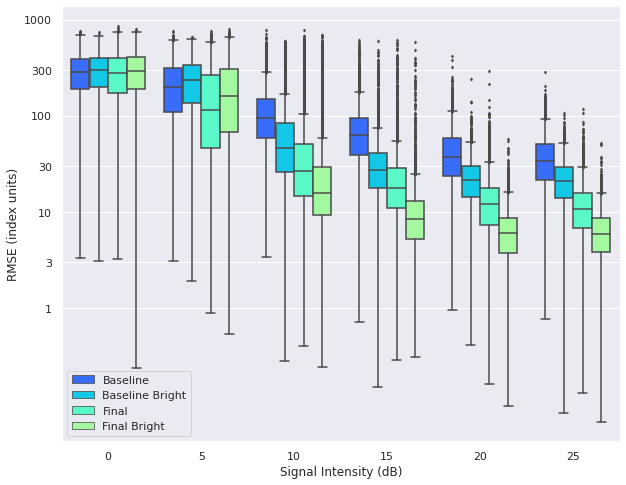

In [3]:
d = {'db': [], 'rmse_index': [], 'model': []}

pred_dicts = {
    'Baseline': np.load(experiment_path + 'baseline_1sig_32bs/test_predictions.npy',
                        allow_pickle=True).item(),
    'Baseline Bright': np.load(experiment_path + 'baseline_1sig_32bs_bright/test_predictions.npy',
                               allow_pickle=True).item(),
    'Final': np.load(experiment_path + 'final_1sig_32bs/test_predictions.npy',
                     allow_pickle=True).item(),
    'Final Bright': np.load(experiment_path + 'final_1sig_32bs_bright/test_predictions.npy',
                            allow_pickle=True).item(),
}

for db in range(0, 30, 5):
    for j in range(4000):
        d['db'].append(db)
        lb = pred_dicts['Baseline']['{:02}db_{:06d}.npy'.format(db, j)]
        rmse_index = np.mean((lb[0] - lb[1])**2)**0.5 * 1024
        d['rmse_index'].append(rmse_index)
        d['model'].append('Baseline')
        
        d['db'].append(db)
        lb = pred_dicts['Baseline Bright']['{:02}db_{:06d}.npy'.format(db, j)]
        rmse_index = np.mean((lb[0] - lb[1])**2)**0.5 * 1024
        d['rmse_index'].append(rmse_index)
        d['model'].append('Baseline Bright')
        
        d['db'].append(db)
        lb = pred_dicts['Final']['{:02}db_{:06d}.npy'.format(db, j)]
        rmse_index = np.mean((lb[0] - lb[1])**2)**0.5 * 1024
        d['rmse_index'].append(rmse_index)
        d['model'].append('Final')
        
        d['db'].append(db)
        lb = pred_dicts['Final Bright']['{:02}db_{:06d}.npy'.format(db, j)]
        rmse_index = np.mean((lb[0] - lb[1])**2)**0.5 * 1024
        d['rmse_index'].append(rmse_index)
        d['model'].append('Final Bright')

df = pd.DataFrame(data=d)

sns.set(palette="rainbow")
fig = plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='db', y='rmse_index', hue='model', data=df, saturation=1, fliersize=2)
h, l = ax.get_legend_handles_labels()
ax.legend(h, l, loc=3)

plt.yscale('log')
plt.xlabel('Signal Intensity (dB)')
plt.ylabel('RMSE (index units)')

ax.set_yticks([1, 3, 10, 30, 100, 300, 1000])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

# plt.savefig('1sig_rmse.pdf', bbox_inches='tight')
plt.show()

## Two signals

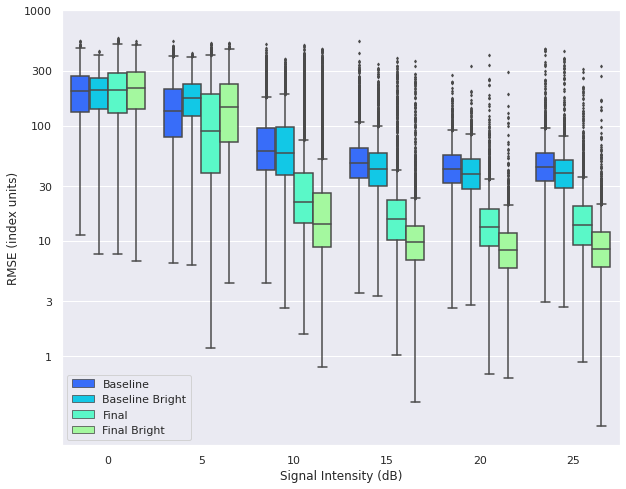

In [4]:
d = {'db': [], 'rmse_index': [], 'model': []}

pred_dicts = {
    'Baseline': np.load(experiment_path + 'baseline_2sig_32bs/test_predictions.npy',
                        allow_pickle=True).item(),
    'Baseline Bright': np.load(experiment_path + 'baseline_2sig_32bs_bright/test_predictions.npy',
                               allow_pickle=True).item(),
    'Final': np.load(experiment_path + 'final_2sig_32bs/test_predictions.npy',
                     allow_pickle=True).item(),
    'Final Bright': np.load(experiment_path + 'final_2sig_32bs_bright/test_predictions.npy',
                            allow_pickle=True).item(),
}

for db in range(0, 30, 5):
    for j in range(4000):
        d['db'].append(db)
        lb = pred_dicts['Baseline']['{:02}db_{:06d}.npy'.format(db, j)]
        rmse_index = np.mean((lb[0] - lb[1])**2)**0.5 * 1024
        d['rmse_index'].append(rmse_index)
        d['model'].append('Baseline')
        
        d['db'].append(db)
        lb = pred_dicts['Baseline Bright']['{:02}db_{:06d}.npy'.format(db, j)]
        rmse_index = np.mean((lb[0] - lb[1])**2)**0.5 * 1024
        d['rmse_index'].append(rmse_index)
        d['model'].append('Baseline Bright')
        
        d['db'].append(db)
        lb = pred_dicts['Final']['{:02}db_{:06d}.npy'.format(db, j)]
        rmse_index = np.mean((lb[0] - lb[1])**2)**0.5 * 1024
        d['rmse_index'].append(rmse_index)
        d['model'].append('Final')
        
        d['db'].append(db)
        lb = pred_dicts['Final Bright']['{:02}db_{:06d}.npy'.format(db, j)]
        rmse_index = np.mean((lb[0] - lb[1])**2)**0.5 * 1024
        d['rmse_index'].append(rmse_index)
        d['model'].append('Final Bright')

df = pd.DataFrame(data=d)

sns.set(palette="rainbow")
fig = plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='db', y='rmse_index', hue='model', data=df, saturation=1, fliersize=2)
h, l = ax.get_legend_handles_labels()
ax.legend(h, l, loc=3)

plt.yscale('log')
plt.xlabel('Signal Intensity (dB)')
plt.ylabel('RMSE (index units)')

ax.set_yticks([1, 3, 10, 30, 100, 300, 1000])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

# plt.savefig('2sig_rmse.pdf', bbox_inches='tight')
plt.show()

## Compare Final to TurboSETI

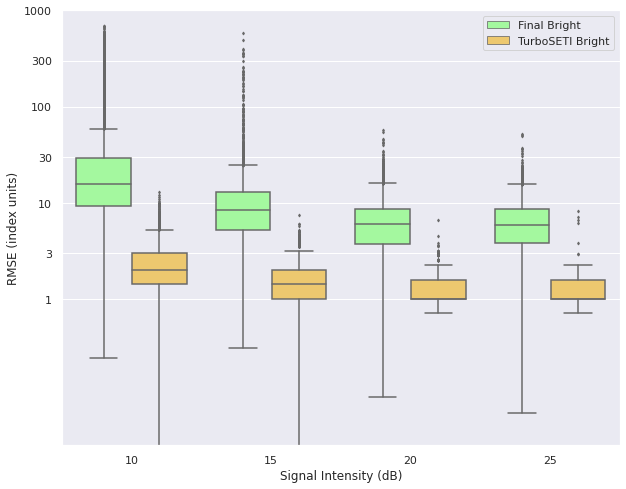

In [5]:
d = {'db': [], 'rmse_index': [], 'model': []}

pred_dicts = {
    'Final Bright': np.load(experiment_path + 'final_1sig_32bs_bright/test_predictions.npy',
                            allow_pickle=True).item(),
    'TurboSETI Bright': np.load(experiment_path + 'turboseti/test_predictions_bright.npy',
                            allow_pickle=True).item(),
}

for db in range(10, 30, 5):
    for j in range(4000):
        d['db'].append(db)
        lb = pred_dicts['Final Bright']['{:02}db_{:06d}.npy'.format(db, j)]
        rmse_index = np.mean((lb[0] - lb[1])**2)**0.5 * 1024
        d['rmse_index'].append(rmse_index)
        d['model'].append('Final Bright')
        
        d['db'].append(db)
        rmse_index = pred_dicts['TurboSETI Bright']['{:02}db_{:06d}.npy'.format(db, j)]
        d['rmse_index'].append(rmse_index)
        d['model'].append('TurboSETI Bright')
        

df = pd.DataFrame(data=d)

sns.set(palette="rainbow")
current_palette = sns.color_palette()

fig = plt.figure(figsize=(10, 8))
my_pal = {
    'Final Bright': current_palette[3],
    'TurboSETI Bright': current_palette[4]
}
ax = sns.boxplot(x='db', 
                 y='rmse_index',
                 hue='model', 
                 data=df,
                 saturation=1, 
                 fliersize=2,
                 palette=my_pal)
h, l = ax.get_legend_handles_labels()
ax.legend(h, l, loc=1)

plt.yscale('log')
plt.xlabel('Signal Intensity (dB)')
plt.ylabel('RMSE (index units)')

ax.set_yticks([1, 3, 10, 30, 100, 300, 1000])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ylim(0.03, 1000)

# plt.savefig('turboseti_rmse.pdf', bbox_inches='tight')
plt.show()